## Visualizing the embeddings in 2D

I updated the syntax for June 2024. Implimented a feature where it would dispalay a summery of every wikipedia article visualized using concurrent calls of the openAi API I also aded an html download for the document.

We will use t-SNE to reduce the dimensionality of the embeddings from 1536 to 2. Once the embeddings are reduced to two dimensions, we can plot them in a 2D scatter plot. The dataset is created in the [Get_embeddings_from_dataset Notebook](Get_embeddings_from_dataset.ipynb).

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!openai migrate



/bin/bash: line 1: openai: command not found


In [3]:
!pip install --upgrade tiktoken
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [5]:
!pip install openai --upgrade
!openai migrate

Retrieving Grit CLI metadata from https://api.keygen.sh/v1/accounts/custodian-dev/artifacts/marzano-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/gouda-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/marzano-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/workflow_runner-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/cli-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/timekeeper-linux-x64



Analyzing Finding files                                                         
Processed 0 files and found 0 matches


### 1. Reduce dimensionality

We reduce the dimensionality to 2 dimensions using t-SNE decomposition.

In [6]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
datafile_path = "/content/drive/MyDrive/eaAlumniEmbedded.csv"
df = pd.read_csv(datafile_path)
FName = ""
indexa =0
bad = []
a = []
for i in range(len(df)-1):
  a.append(i)
  if df.text.iloc[i].split('\n')[0] == FName:
    bad.append(i)
    df.text.iloc[indexa]= df.text.iloc[indexa]+df.text.iloc[i]

  else:
    FName =df.text.iloc[i].split('\n')[0]
    indexa=i
df = df.drop(bad)
print(df)



                                                  text  \
0    George Munger (American football)\n\n{{Short d...   
9    Jerome Allen (basketball)\n\n{{Short descripti...   
21   Alan W. Lukens\n\n{{Short description|American...   
24   Henry G. Morse\n\n{{short description|American...   
29   Robert Venturi\n\n{{short description|American...   
38   Morrison Heckscher\n\n{{Short description|Amer...   
44   Brian Dougherty\n\n{{Short description|America...   
53   George David\n\n{{Short description|American b...   
55   Gerald Henderson Jr.\n\n{{Short description|Am...   
65   John Yoo\n\n{{Short description|American attor...   
81   Britton Chance Jr.\n\n{{Short description|Amer...   
99   Kyle Eckel\n\n{{Short description|American foo...   
107  Maury Henry Biddle Paul\n\n{{short description...   
110  Charles L. Tutt Sr.\n\n{{more footnotes needed...   
114  Edward Vick\n\n{{Infobox person\n|name        ...   
120  Anthony Apesos\n\n{{Short description|American...   
126  R. W. B. 

In [7]:
import tiktoken
import pandas as pd
encoding = tiktoken.get_encoding("cl100k_base")
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

prompts = []
longs = []
for i in range(len(df)):
  prompts.append("Summarize this persons life description in 1 textual sentence with line breaks every 10 words focusing on their occupation and work primarily, also say when they graduated from or attended EA "+ df.text.iloc[i])
  maxToken = 3900
  numt =  num_tokens_from_string (prompts[i], "cl100k_base")
  while numt >maxToken:
    print(str(i) + ": "+ str(numt)+ ": "+ str(len(prompts[i]))+ ": "+ str(len(prompts[i])/numt))
    #prompts[i] = prompts[i][:len]
    tokenDiff = numt-maxToken
    charsToRemove = int(tokenDiff*3.7)
    prompts[i] = prompts[i][:len(prompts[i])-charsToRemove]
    numt =  num_tokens_from_string (prompts[i], "cl100k_base")


prompts2= prompts[1:4]





4: 4392: 17847: 4.063524590163935
9: 6037: 27308: 4.523438794103031
9: 4308: 19402: 4.503714020427112
9: 3981: 17893: 4.494599346897765
9: 3924: 17594: 4.483690112130479
9: 3906: 17506: 4.4818228366615465
9: 3901: 17484: 4.481927710843373
10: 6078: 23301: 3.8336623889437313
10: 3991: 15243: 3.8193435229265846
21: 5008: 19378: 3.8694089456869007
21: 3996: 15279: 3.8235735735735736
21: 3906: 14924: 3.8207885304659497
26: 4644: 16322: 3.5146425495262705
29: 7898: 29237: 3.7018232463914913
34: 5143: 16728: 3.2525763173245186
40: 5100: 19846: 3.891372549019608
43: 5746: 21716: 3.7793247476505396
43: 3957: 14886: 3.76194086429113
43: 3905: 14676: 3.758258642765685


In [8]:
print(prompts2)

['Summarize this persons life description in 1 textual sentence with line breaks every 10 words focusing on their occupation and work primarily, also say when they graduated from or attended EA Jerome Allen (basketball)\n\n{{Short description|American basketball player and coach}}\n{{Use mdy dates|date=June 2022}}\n{{Infobox basketball biography\n| name            = Jerome Allen\n| image           = \n| width           =\n| caption         =\n| league          = [[National Basketball Association|NBA]]\n| team            = \n| position        = Assistant coach\n| height_ft       = 6\n| height_in       = 4\n| weight_lb       = 184\n| birth_date      = {{birth date and age|1973|01|28}}\n| birth_place     = [[Philadelphia|Philadelphia, Pennsylvania]], U.S.\n| high_school     = [[Episcopal Academy]]<br />([[Merion, Pennsylvania]])\n| college         = [[Penn Quakers men\'s basketball|Penn]] (1991–1995)\n| draft_year      = 1995\n| draft_round     = 2\n| draft_pick      = 49\n| draft_team   

In [12]:
import os
from openai import OpenAI, Completion
from concurrent.futures import ThreadPoolExecutor
import pandas as pd

os.environ['OPENAI_API_KEY'] = 'enter your key here'
api_key = os.environ['OPENAI_API_KEY']

# Sample prompts

# Instantiate the client
client = OpenAI(api_key=api_key)

def generate_summary(prompt):
    # Use OpenAI GPT-3 to generate summary for the prompt
    response: Completion = client.completions.create(
        model="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens=50,  # Adjust max_tokens based on desired length
        temperature=0.7,
        n=1,  # Number of completions to generate
        # model="gpt-3.5-turbo",  # Specify the GPT-3 model
    )

    # Extract the summarized text from the response
    summary_text = response.choices[0].text.strip()

    return summary_text

# Create a ThreadPoolExecutor with a maximum of concurrent threads
with ThreadPoolExecutor() as executor:
    # Use map to preserve the order of prompts and their corresponding summaries
    results = list(executor.map(generate_summary, prompts))

# Print the results
GptListy = []
for i, summary in enumerate(results):
    print(f"Prompt {i+1} Summary: {summary}\n{'-'*50}")
    GptListy.append(summary)
df_GptListy = pd.DataFrame({'Summary': GptListy})

# Save the DataFrame to a CSV file
df_GptListy.to_csv('/content/drive/MyDrive/GptListy.csv', index=False)


Prompt 1 Summary: George Almond Munger, American athlete, coach and athletic director, played college football at the University of Pennsylvania from 1930 to 1933, coached the Penn football team from 1938 to 1953 and served as director of
--------------------------------------------------
Prompt 2 Summary: Jerome Allen (basketball) is a former American professional basketball player who graduated from Episcopal Academy and went on to play in the NBA before becoming a college head coach at Penn, where he resigned after the 2014-15 season, and
--------------------------------------------------
Prompt 3 Summary: Alan W. Lukens was an American diplomat who served in various diplomatic posts throughout Africa and as the ambassador to the People's Republic of the Congo from 1984 to 1987, graduating from Princeton University in 1948 after serving in
--------------------------------------------------
Prompt 4 Summary: Henry Grant Morse, Jr was an American architect who relocated two English ma

In [14]:
df_GptListy = pd.DataFrame({'Summary': GptListy})

# Save the DataFrame to a CSV file
df_GptListy.to_csv('/content/drive/MyDrive/GptListy.csv', index=False)


In [24]:
import pandas as pd

# Load the DataFrame from the CSV file
loaded_df_GptListy = pd.read_csv('/content/drive/MyDrive/GptListy.csv')

# Convert 'Summary' column back into a list
GptListy = loaded_df_GptListy['Summary'].tolist()

# Now, loaded_GptListy contains the list of summaries
print(GptListy)

['George Munger was an American football player and coach who attended the University of Pennsylvania, Episcopal Academy, and The Hill School, and coached the Penn Quakers football team from 1938 to 1953, compiling a record of 82-42-10.', "Jerome Allen (basketball) graduated from Episcopal Academy and played professional basketball from 1995-2009; he then served as the head coach for Penn Quakers men's basketball from 2009-2015 and was an assistant coach for the Boston Celtics from 2015-", 'Alan W. Lukens graduated from the Episcopal Academy in 1942 and served in the U.S. Army during World War II before joining the Foreign Service in 1951 and working in various diplomatic posts throughout Africa.', 'Henry G. Morse graduated from the Episcopal Academy near Philadelphia and studied architecture at the Massachusetts Institute of Technology, before establishing himself as an architect in New York City, designing and relocating two English manor houses to Richmond, Virginia.', "and Contradi

In [25]:
def addBreak(string_list):
    result_list = []

    for original_string in string_list:
        # Check if the element is a string
        if isinstance(original_string, str):
            # Add a new line every 10 characters
            modified_string = '<br>'.join(original_string[i:i + 40] for i in range(0, len(original_string), 40))

            # Append the modified string to the result list
            result_list.append(modified_string)
        else:
            # If not a string, append the original element
            result_list.append(original_string)

    return result_list
GptListy = addBreak(GptListy)

In [26]:


# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(46, 2)

### 2. Plotting the embeddings

We colour each review by its star rating, ranging from red to green.

We can observe a decent data separation even in the reduced 2 dimensions.

<ipython-input-20-43f4e4230896>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(vis_dims[:, 0], vis_dims[:, 1], c=colors, cmap=colormap, alpha=0.3)


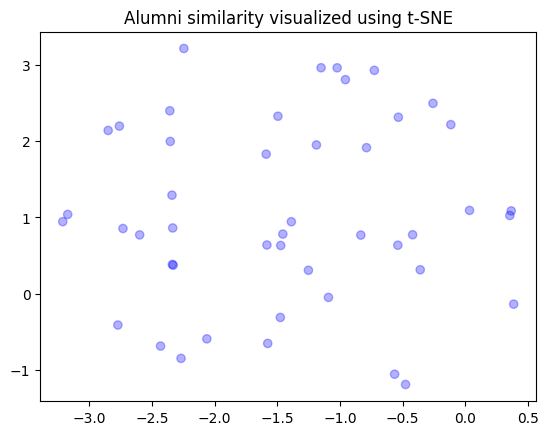

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.manifold import TSNE
import ast  # Import the ast module for literal_eval

df['Summary'] = GptListy
# Assuming df is your DataFrame with columns 'text' and 'embedding'
texts = df['text'].tolist()
embeddings_str = df['embedding'].tolist()

# Convert string representations of embeddings to actual lists
embeddings = [ast.literal_eval(embedding_str) for embedding_str in embeddings_str]

# Convert embeddings to a numpy array
embedding_array = np.array(embeddings)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
vis_dims = tsne.fit_transform(embedding_array)

colors = ["blue"] * len(df)  # Set a single color for all data points

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(vis_dims[:, 0], vis_dims[:, 1], c=colors, cmap=colormap, alpha=0.3)

plt.title("Alumni similarity visualized using t-SNE")
plt.show()


In [27]:
import plotly.express as px

df['Summary'] = GptListy

# Assuming df is your DataFrame with columns 'text' and 'embedding'
texts = df['text'].tolist()

# Create a new DataFrame for Plotly with names and coordinates
plotly_df = pd.DataFrame({'Name': [text.split('\n')[0] for text in texts],
                          'X': vis_dims[:, 0],
                          'Y': vis_dims[:, 1], 'Summary': df['Summary']})

# Create a scatter plot with Plotly
fig = px.scatter(plotly_df, x='X', y='Y', hover_name='Name',hover_data='Summary', color_discrete_sequence=['blue'])

# Set layout and show the figure
fig.update_layout(title="Alumni similarity visualized using t-SNE", showlegend=False)
fig.show()

In [28]:
html_file_path = "/content/plotly_chart.html"  # Specify your desired file path
fig.write_html(html_file_path)


In [29]:
from google.colab import files
files.download(html_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>